<a href="https://www.kaggle.com/code/ajaykuchhadiya/ann-project?scriptVersionId=135826774" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv


In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

<b>observation : </b>here, we can see there are no null values in the dataset

In [5]:
df.corr()['Exited']

/tmp/ipykernel_20/2982776924.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Exited']


RowNumber            -0.016140
CustomerId           -0.006203
CreditScore          -0.026771
Age                   0.285296
Tenure               -0.013656
Balance               0.118577
NumOfProducts        -0.047611
HasCrCard            -0.006976
IsActiveMember       -0.156356
EstimatedSalary       0.012490
Exited                1.000000
Complain              0.995693
Satisfaction Score   -0.005849
Point Earned         -0.004628
Name: Exited, dtype: float64

<h4><b>Obseravtion :</b>

1. Here the 3 main coulmn to focus on, which have high effect on customer leaving the bank are : [Age, Complain, IsActiveMember] which is quite undestandable<br>
2. Un-necessary columns : [CustomerId, Point Earned, Satisfaction Score,HasCrCard]. These column can be dropped from the dateset. 


In [6]:
df = df.drop(columns=['CustomerId', 'Point Earned', 'Satisfaction Score','HasCrCard', 'Surname'])

In [7]:
print(df.shape)
df.head()

(10000, 13)


,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Complain,Card Type
0,1,619,France,Female,42,2,0.00,1,1,101348.88,1,1,DIAMOND
1,2,608,Spain,Female,41,1,83807.86,1,1,112542.58,0,1,DIAMOND
2,3,502,France,Female,42,8,159660.80,3,0,113931.57,1,1,DIAMOND
3,4,699,France,Female,39,1,0.00,2,0,93826.63,0,0,GOLD
4,5,850,Spain,Female,43,2,125510.82,1,1,79084.10,0,0,GOLD


In [8]:
df.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Complain
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.515100,100090.239881,0.203800,0.204400
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.499797,57510.492818,0.402842,0.403283
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000,0.000000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,51002.110000,0.000000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,100193.915000,0.000000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,149388.247500,0.000000,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,199992.480000,1.000000,1.000000


In [9]:
df.duplicated().sum()

0

**Obseration** : dataset has no duplicated values

In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
df['Card Type'].value_counts()

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64

In [13]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender', 'Card Type'], drop_first = True)

OHE categorical data : 

In [14]:
df.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Complain,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,1,619,42,2,0.00,1,1,101348.88,1,1,0,0,0,0,0,0
1,2,608,41,1,83807.86,1,1,112542.58,0,1,0,1,0,0,0,0
2,3,502,42,8,159660.80,3,0,113931.57,1,1,0,0,0,0,0,0
3,4,699,39,1,0.00,2,0,93826.63,0,0,0,0,0,1,0,0
4,5,850,43,2,125510.82,1,1,79084.10,0,0,0,1,0,1,0,0


In [15]:
y = df['Exited']
X = df.drop(columns = ['Exited'])
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size = 0.2,random_state = 1)

In [16]:
print(X_train.shape)

(8000, 15)


<h3>Scaling the values for efficient convergence :</h3>

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled

array([[-0.80531942, -0.23082038, -0.94449979, ..., -0.57369368,
         1.7171684 , -0.57715782],
       [ 0.04247882, -0.25150912, -0.94449979, ..., -0.57369368,
         1.7171684 , -0.57715782],
       [-0.84899177, -0.3963303 ,  0.77498705, ..., -0.57369368,
         1.7171684 , -0.57715782],
       ...,
       [-1.42539753,  0.22433188,  0.58393295, ..., -0.57369368,
         1.7171684 , -0.57715782],
       [ 0.06050233,  0.13123255,  0.01077067, ..., -0.57369368,
        -0.58235407,  1.73262835],
       [-1.65762353,  1.1656695 ,  0.29735181, ...,  1.74309049,
        -0.58235407, -0.57715782]])

# Creating Dense model : 

In [19]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [20]:
model = Sequential()
model.add(Dense(3, activation = 'relu', input_dim = 15))
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 48        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


In [22]:

model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [23]:
from keras.callbacks import EarlyStopping

In [24]:
callback = EarlyStopping(
    monitor="val_loss", 
    min_delta=0.00001, 
    patience=20,        
    verbose=1,          
    mode="auto",        
    baseline=None,     
    restore_best_weights=False  
)

In [25]:
 history = model.fit(X_train_scaled, y_train,epochs = 500, validation_split = 0.8,callbacks=callback) 


Epoch 1/500
50/50 [==============================] - 2s 13ms/step - loss: 0.8182 - accuracy: 0.3071 - val_loss: 0.7720 - val_accuracy: 0.3362
Epoch 2/500
50/50 [==============================] - 0s 8ms/step - loss: 0.7358 - accuracy: 0.4065 - val_loss: 0.7020 - val_accuracy: 0.4973
Epoch 3/500
50/50 [==============================] - 0s 7ms/step - loss: 0.6749 - accuracy: 0.5947 - val_loss: 0.6494 - val_accuracy: 0.6908
Epoch 4/500
50/50 [==============================] - 0s 7ms/step - loss: 0.6275 - accuracy: 0.7367 - val_loss: 0.6076 - val_accuracy: 0.7903
Epoch 5/500
50/50 [==============================] - 0s 8ms/step - loss: 0.5876 - accuracy: 0.8243 - val_loss: 0.5709 - val_accuracy: 0.8671
Epoch 6/500
50/50 [==============================] - 0s 7ms/step - loss: 0.5516 - accuracy: 0.8843 - val_loss: 0.5360 - val_accuracy: 0.9206
Epoch 7/500
50/50 [==============================] - 0s 8ms/step - loss: 0.5167 - accuracy: 0.9362 - val_loss: 0.5016 - val_accuracy: 0.9553
Epoch 8/500


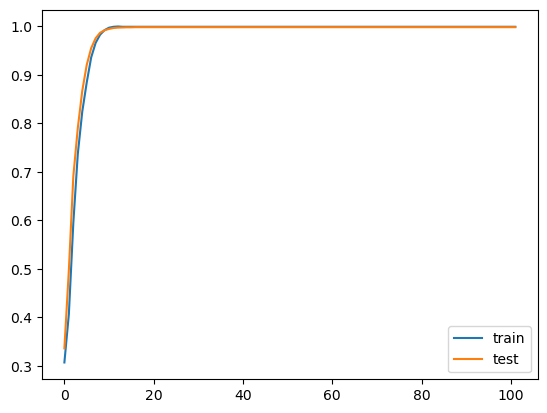

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Here, we can see that the training data is conciding over the test data close to exact. Giving us good accuracy at both 

In [27]:
# now predicting if the customer will leave the bank or not
y_log = model.predict(X_test_scaled)
y_log

63/63 [==============================] - 0s 1ms/step


array([[5.0470413e-04],
       [3.3173256e-03],
       [5.1995990e-04],
       ...,
       [7.8430559e-05],
       [6.3018402e-04],
       [2.8523037e-03]], dtype=float32)

In [28]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.998